<a href="https://colab.research.google.com/github/LuisCastroV/ADA-Informes/blob/main/Informe_10_Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema del árbol recubridor mínimo *(Algoritmo de Kruskal)*
---

**Entrada**: Grafo conectado no dirigido $G=(V,E)$ y un costo real $c_e$ para cara arco $e\in E$.

**Salida**: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.

--- 
**Imagen referencial del algoritmo de Kruskal:**

![image](https://upload.wikimedia.org/wikipedia/commons/a/ab/Ricerca_operativa_minimo_albero_04.gif)

---
El problema del árbol recubridor mínimo trata sobre conectar un conjunto de objetos de la forma más económica posible. Este problema emerge de manera natural en varios dominios de aplicación, incluyendo redes de computadores y aprendizaje automático.

Con el árbol recubridor de $G$, nos referimos a un subconjunto de arcos $T\subseteq E$ que satisface algunas propiedades como:


- *Sea $G=(V,E)$ un grafo no dirigido y $v,w\in V$ dos nodos distintos tal que $(v,w)\notin V$.*
> Creación de ciclos: *Si $v$ y $w$ se encuentran en el mismo componente conectado de $G$, entonces, agregar un arco $(v,w)$ genera al menos un nuevo ciclo sin cambiar la cantidad de componentes conectados.*
>
> Fusión de componentes: *Si $v$ y $w$ se encuentran en distintos componentes conectados de $G$, entonces, agregar un arco $(v,w)$ no genera un nuevo ciclo e incrementa la cantidad de componentes conectados en 1.*

- *Un árbol recubridor de $n$ vértices tiene $n-1$ arcos.*

- *Sea $G=(V,E)$ un grafo, y $T\subseteq E$ un subconjunto de $|V|-1$ arcos. Entonces, $T$ es un árbol recubridor si y solo si no tiene ciclos.*

#2. Descripción del algoritmo

Recibe un grafo $G$ de $n$ nodos, retornando las conexiones del árbol recubridor encontrado, junto con el peso de cada una y la suma total de los arcos del árbol. El mecanismo funciona de la siguiente manera:

- En una lista se guarda cada conexión del grafo, las que luego se ordenan de menor a mayor en base al peso utilizando la función sorted de Python.
- Luego, en un ciclo $for$ recorremos cada $arco$, con sus vértices $(u,v)$, comenzando con el menor. En cada iteración se verifica si es que se genera un ciclo con ayuda de $Union-Find$. Dependiendo del resultado pueden suceder dos posibilidades: Si $u$ y $v$ no provocan un ciclo, se añade el $arco$ al árbol recubrido mínimo y se "unen" las componentes de $u$ y $v$, en el otro caso, no se agrega y seguimos con el siguiente $arco$.
- Finalmente retornamos el árbol recubridor mínimo con las conexiones y el peso de cada uno.

#2.1. Código 

defaultdict(<class 'int'>, {(0, 2): 1, (3, 5): 2, (1, 4): 3, (2, 5): 4, (1, 2): 5}) | Suma de Arcos = 15


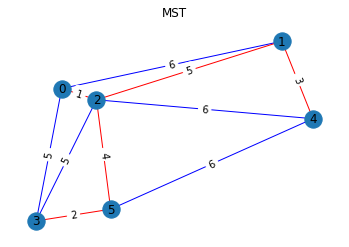

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import random

class Kruskal:
    def __init__(self, nodes, edges) -> None:
        self.nodes = nodes
        self.edges = edges
    
    #Árbol recubridor mínimo
    def mst(self):
        num_nodes = len(self.nodes) #Número de nodos
        mst_edges = defaultdict(int)
        root = [_ for _ in range(num_nodes)]
        rank = [0] * num_nodes

        #Encontrar
        def find(v):
            while root[v] != v:
                v = root[v]
            return v 

        #Unión
        def union(u, v):
            u_root = find(u)
            v_root = find(v)
            if rank[u_root] > rank[v_root]:
                root[v_root] = u_root
            elif rank[u_root] < rank[v_root]:
                root[u_root] = v_root
            else:
                root[v_root] = u_root
                rank[u] += 1
        edge_dict = defaultdict(int) #Mapeo de peso de borde
        for (u, v, w) in self.edges:
            edge_dict[(u, v)] = w
        sorted_edge_dict = sorted(edge_dict.items(), key=lambda x: x[1]) #Clasificar por peso (orden)
        for ((u, v), w) in sorted_edge_dict:
            if find(u) == find(v):
                continue
            else:
                union(u, v)
                mst_edges[(u, v)] = w
        return mst_edges        

#Impresión
def draw(G, color_edges):
    edges = list(G.edges)
    num_edge = len(edges)
    edge_color = ['b'] * num_edge
    color_edges = set(color_edges)
    for i in range(num_edge):     
        #Gráfico no dirigido
        u, v = edges[i][0], edges[i][1]
        if (u, v) in color_edges or (v, u) in color_edges:
            edge_color[i] = 'r'
    pos = nx.kamada_kawai_layout(G)
    plt.title('MST')
    nx.draw(G, pos, with_labels=True, edge_color=edge_color)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

nodes = [0, 1, 2, 3, 4, 5]
edges = [(0, 1, 6), (0, 2, 1), (0, 3, 5), (1, 2, 5), (1, 4, 3), (2, 3, 5), (2, 4, 6), (2, 5, 4), (3, 5, 2), (4, 5, 6)]
mst_edges = Kruskal(nodes, edges).mst()
print('{} | Suma de Arcos = {}'.format(mst_edges, sum(mst_edges.values())))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
draw(G, list(mst_edges.keys()))

#2.2. Ejemplo

Para mostrar el funcionamiento del algoritmo, consideraremos el siguiente grafo no dirigido.

$E = [(0, 1, 7), (1, 2, 8), (0, 3, 5), (1, 3, 9), (1, 4, 7), (2, 4, 5), (3, 4, 15), (3, 5, 6), (4, 5, 8), (4, 6, 9), (5, 6, 11)]$

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-1.png)

Se guarda cada peso de cada arco dentro de una lista junto a sus conexiones, siendo las primeras dos variables de cada posición cada nodo conectado y la última el peso de su arco que los conecta, al tener estos datos, ahora procedemos a ordenar cada uno con respecto a su peso: 

$E = [(0, 3, 5), (2, 4, 5), (3, 5, 6), (0, 1, 7), (1, 4, 7), (4, 5, 8), (1, 2, 8), (1, 3, 9), (4, 6, 9), (5, 6, 11), (3, 4, 15)]$

Ahora ingresamos al ciclo, en donde vemos cada conexión, comenzando con la menor, se verifica que no se genere un ciclo, si se cumple, entonces se agrega la conexión $(0, 3, 5)$ a nuestro árbol recubridor.

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-2.png)

Seguimos con la siguiente conexión $(2, 4, 5)$. Verificamos, no genera un ciclo, por ende, se agrega al árbol. 

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-3.png)

Seguimos con la siguiente conexión $(3, 5, 6)$. Verificamos, no genera un ciclo, por ende, se agrega al árbol. 

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-4.png)


Seguimos con la siguiente conexión $(0, 1, 7)$. Verificamos, no genera un ciclo, por ende, se agrega al árbol. 

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-5.png)

Seguimos con la siguiente conexión $(1, 4, 7)$. Verificamos, no genera un ciclo, por ende, se agrega al árbol. 

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-6.png)

Seguimos con la siguiente conexión $(4, 5, 8)$. Verificamos, si genera un ciclo, por ende, no se agrega al árbol. 

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-7.png)

Seguimos con la siguiente conexión $(1, 2, 8)$. Verificamos, si genera un ciclo, por ende, no se agrega al árbol. 

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-8.png)

Seguimos con la siguiente conexión $(1, 3, 9)$. Verificamos, si genera un ciclo, por ende, no se agrega al árbol. 

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-9.png)

Seguimos con la siguiente conexión $(4, 6, 9)$. Verificamos, no genera un ciclo, por ende, se agrega al árbol. 

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-10.png)

El árbol recubridor está conectado ya que se cumplió que los arcos son $V-1$, donde $V$ son los vertices que son $7$, por ende, los arcos deben ser 6, ya que se cumplieron los arcos, los bordes restantes se descartan.

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-11.png)

Finalmente quedará un árbol de peso $39$.

![image](https://www.techiedelight.com/wp-content/uploads/2016/11/Kruskal-12.png)

#3. Correctitud

Sea $G$ un grafo ponderado conectado. Sea $H$ $=$ $T_m$ el subgrafo producido por el algoritmo. Por construcción es claro que $T_0$, $T_1$, $...$,$T_m$ $=$ $H$ son todos acíclicos: Por lo tanto $H$ es bosque.

*Afirmación*: $H$ está conectado. Probaremos esto usando el argumento de la contradicción.

Suponga que $H$ es desconectado. Entonces hay al menos dos árboles desconectados en el bosque $H$. Como $G$ está conectado, hay una secuencia de aristas $e_1$, $e_2$,$...$,$e_n$ $\notin$ $H$ = $T_m$ que conectan los vértices de un par de árboles desconectados en el bosque. Entonces $T_m$ $\cup$ {$e_1$} es acíclico, lo cual es una contradicción ya que el algoritmo no se detendría en $i$$=$$m$.

Entonces $H$ es un árbol de expansión de $G$. Basta mostrar que es mínimo.

Probamos lo siguiente por inducción: si $F$ es el conjunto de aristas elegido en cualquier etapa del algoritmo, entonces hay un árbol de expansión mínimo que contiene $F$.

*Nota:* Esta prueba por inducción completa la prueba de corrección ya que en algún momento $F$ es $H$.

*Caso base:* Claramente, la proposición es verdadera si $F$ está vacía: cualquier árbol de expansión mínimo servirá.

Ahora suponga que $F$ contiene $n$ $\geq$ $0$ aristas y la proposición es verdadera. Sea $T$ $=$ $(V,E)$ un árbol de expansión mínimo que contiene $F$.

Si $E$ $=$ $F$ entonces hemos terminado. Así que suponga que $F$ $\subset$ $E$ y, por lo tanto, el algoritmo no está terminado. Necesitamos mostrar que cuando el algoritmo agrega otra arista $e$ a $F$, hay un árbol de expansión mínimo que contiene $F$ $\cup$ {$e$}.

Si la siguiente arista $e$ agregada por el algoritmo está en $E$, entonces la proposición es verdadera para $F$ $\cup$ {$e$} y estaríamos listos por inducción.

De lo contrario, hay un ciclo $C$ en $T$ $\cup$ {$e$}, el nuevo borde agregado entre los vértices de un árbol crea un ciclo, además, hay otra arista $e'$ $\in$ $C$ tal que $e'$ no está en $F$, ya que $F$ $\cup$ {$e$} debe ser acíclico, dado que $e'$ no fue elegido por el algoritmo, $peso(e')$ $\geq$ $peso(e)$.

Entonces $T'$ $=$ ($V$, ($E$ $\setminus${$e'$}) $\cup$ {$e$}) es un árbol de expansión. La suma de los pesos en $T'$ es la suma de los pesos en $T$ más $(peso(e) - peso(e'))$ $\leq$ $0$.

Entonces $T'$ tiene una suma de pesos que es menor o igual que la suma de pesos en $T$. Pero $T$ tiene un peso mínimo; entonces $T'$ es un $MST$. Entonces terminamos por inducción ya que $T'$ es un árbol de expansión mínimo que contiene $F$ $\cup$ {$e$}.

#4. Tiempo de ejecución 

Podemos separar el algoritmo en *implementación directa* y *con la estructura de datos Union-Find*

**1. Implementación directa**

En primer lugar, el algoritmo ordena los arcos de forma decreciente según su costo asociado, esta operación tiene un costo de **O(E log V)**, siendo E el número de arcos y V el de nodos.

Para el loop que agrega arcos a nuestra solución:

- El ciclo realiza E iteraciones. Cada iteración es responsable de revisar si el arco $e = (u,v)$ puede ser agregado a la solución y que tenemo hasta el momento (no tiene un ciclo).

- La agregación de un arco $e$ solamente crea un ciclo si **ya existe un camino de u a v**. Esta operación puede ser realizada en tiempo lineal usando cualquier algoritmo de búsqueda en grafos empezando desde **v**. Al existir **V** nodos a considerar en este análisis, dentro del ciclo tenemos un aporte de O(V).

Por lo tanto, el tiempo de ejecución del algoritmo implementado de forma directa es de **O(VE)**.

**2. Implementación Union-Find**

En esta implementación se analiza paso a paso el procedimiento para determinar el tiempo de ejecución:

$$T_{sort}(E) + O(V) * T_{Make-Set} + O(E)(T_{Find} + T_{Union}) = O(Elog(E)+E_α(V))$$

Análisis del tiempo de ejecución del algoritmo:

- La ordenación de las aristas lleva tiempo **O(E log(E))**
- Tras la ordenación, iteramos por todas las aristas E y aplicamos el algoritmo de union-find.
- Las operaciones de búsqueda y unión pueden tardar como máximo **O(log(V)).
- Por lo tanto, la complejidad total es de **O(Elog(E) + Elog(V))**.
- El valor de E puede ser como máximo O(2V), por lo que O(log(V)) es O(log(E)) igual. 

Por lo tanto, la complejidad temporal global de la implementación union-find es **O(Elog(E)) u O(Elog(V))**.

#5. Experimento

#5.1. Código de Prim

defaultdict(<class 'int'>, {(0, 2): 1, (2, 5): 4, (5, 3): 2, (2, 1): 5, (1, 4): 3}) | Suma de Arcos 15


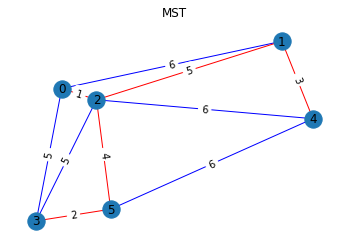

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
from collections import defaultdict

class Prim:
    def __init__(self, nodes, edges) -> None:
        self.nodes = nodes
        self.edges = edges
    
    def mst(self, start_node):
        num_nodes = len(self.nodes)
        mst_edges = defaultdict(int)
        edge_weight = defaultdict(int) 
        node_neighbors = defaultdict(set) 
        visited = set()  
        visited.add(start_node)
        count = 1 

        for (u, v, w) in self.edges:
            node_neighbors[u].add(v)
            node_neighbors[v].add(u)
            edge_weight[(u, v)] = edge_weight[(v, u)] = w
            
        while count != num_nodes:
            min_weight = sys.maxsize
            cur_node, next_node = None, None
            for u in visited:
                for v in node_neighbors[u]:
                    if v not in visited and edge_weight[(u, v)] < min_weight:
                        min_weight = edge_weight[(u, v)]
                        cur_node = u
                        next_node = v     
            visited.add(next_node)
            count += 1
            if cur_node != None and next_node != None:
                mst_edges[(cur_node, next_node)] = min_weight
        return mst_edges

def draw(G, color_edges):
    edges = list(G.edges) 
    color_edges = set(color_edges) 
    num_edges = G.number_of_edges() 
    edge_color = ['b'] * num_edges 

    for i in range(num_edges):
        u, v = edges[i][0], edges[i][1]
        if (u, v) in color_edges or (v, u) in color_edges:
            edge_color[i] = 'r' 
    pos = nx.kamada_kawai_layout(G)
    plt.title('MST')
    edge_labels = nx.get_edge_attributes(G, 'weight') 
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, pos, with_labels=True, edge_color=edge_color) 
    plt.show()

nodes = [0, 1, 2, 3, 4, 5]
edges = [(0, 1, 6), (0, 2, 1), (0, 3, 5), (1, 2, 5), (1, 4, 3), (2, 3, 5), (2, 4, 6), (2, 5, 4), (3, 5, 2), (4, 5, 6)]
start_node = 0 
mst_edges = Prim(nodes, edges).mst(start_node)
print('{} | Suma de Arcos {}'.format(mst_edges, sum(mst_edges.values())))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
draw(G, list(mst_edges.keys()))

#5.2. Prim vs Kruskal 

- El algoritmo de Prim siempre elige el siguiente borde que es vecino de los vértices en una solución parcialmente generada y la selección de la ruta se basa en vértices.
- El algoritmo de Kruskal siempre elige el borde que tiene un peso mínimo y la selección de la ruta se basa en los bordes.
- El algoritmo de Prim asegura que la solución parcial sea siempre un árbol, no es necesario clasificar los bordes y la solución se inicia con un nodo.
- En el algoritmo de Kruskal, una solución parcial puede ser un bosque, la clasificación de los bordes es obligatoria y la solución se inicia con una ventaja.
- El algoritmo de Prim es una mejor opción para el grafo denso.
- El algoritmo de Kruskal es una mejor opción para el grafo disperso.